In [44]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires (1).csv


In [74]:
import pandas as pd
import numpy as np
FF = pd.read_csv("forestfires.csv")

In [46]:
FF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [47]:
FF.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [48]:
FF.head

<bound method NDFrame.head of     month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0  

In [49]:
FF1 = FF.iloc[:,0:11]
Forest = pd.concat([FF1,FF['size_category']],axis=1)
Forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


<Axes: xlabel='temp', ylabel='wind'>

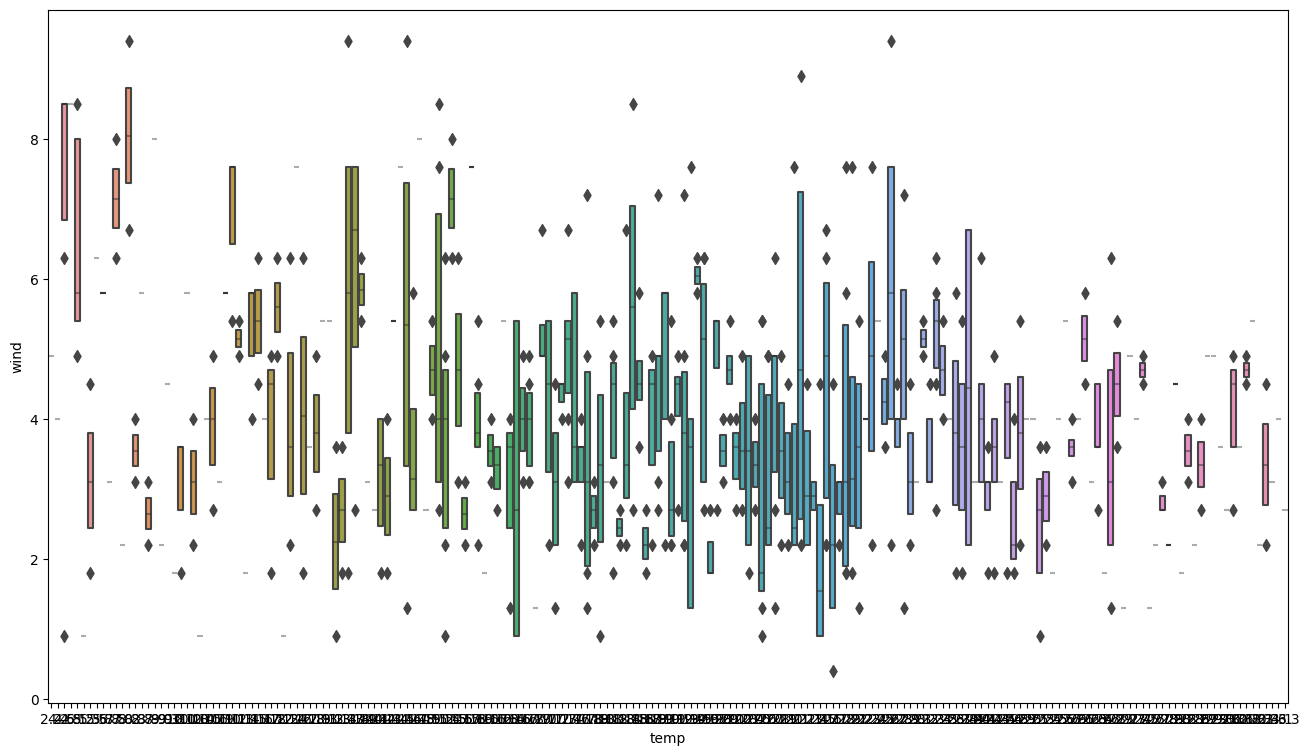

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (16,9));
sns.boxenplot(x ='temp', y = 'wind', data = FF1)

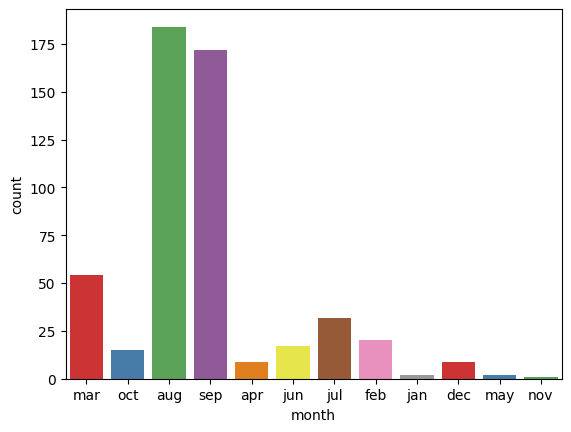

In [51]:
FF1['month'] = FF1['month'].astype(str)
sns.countplot(data = FF1, x ='month', palette = 'Set1')
plt.show()

<Axes: xlabel='DMC'>

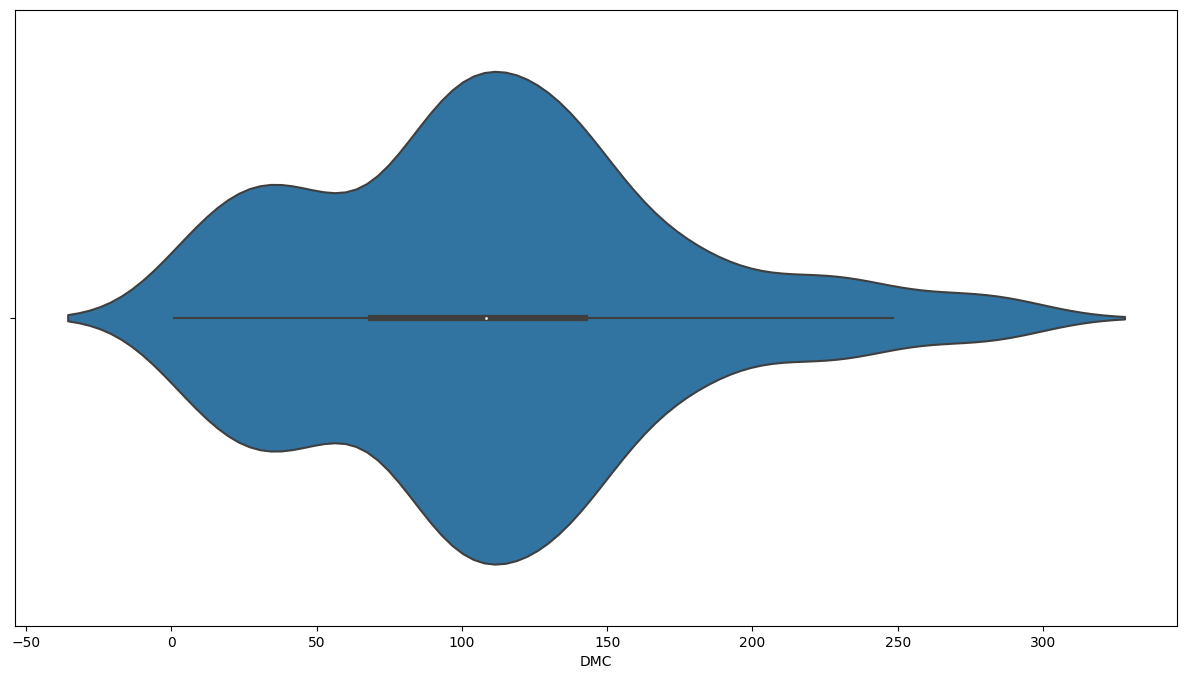

In [52]:
plt.figure(figsize = (15,8));
sns.violinplot(x= 'DMC', Y = 'DC', data = FF1 )

In [53]:
# Linear Encoding
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
Forest['month'] = LE.fit_transform(Forest['month'])
Forest['day'] = LE.fit_transform(Forest['day'])
Forest['size_category'] = LE.fit_transform(Forest['size_category'])

In [54]:
Forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [55]:
X = Forest.iloc[:,0:11]
Y = Forest.iloc[:,-1]
X.head(9)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,1,3,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,1,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,1,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,11,5,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0


In [56]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [57]:
sns.pairplot(Forest, hue = 'size_category')

Output hidden; open in https://colab.research.google.com to view.

Neural Network

In [58]:
np.random.seed(9)
# Split X and Y Variables
X = Forest.iloc[:,0:11]
Y = Forest.iloc[:,-1]

In [59]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [60]:
#   Creating Model
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(14, input_dim = 11, activation = 'relu')) # 1st layer
model.add(Dense(11, activation = 'relu')) # 2nd layer
model.add(Dense(1, activation = 'sigmoid')) # 3rd layer

In [61]:
#   Complie Model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [62]:
# Fit the Model
His = model.fit(X,Y, validation_split = 0.33, epochs =250, batch_size = 10)

Epoch 1/250
35/35 [==============================] - 1s 8ms/step - loss: 22.6704 - accuracy: 0.5289 - val_loss: 13.2419 - val_accuracy: 0.6784
Epoch 2/250
35/35 [==============================] - 0s 3ms/step - loss: 4.7408 - accuracy: 0.6416 - val_loss: 3.2405 - val_accuracy: 0.4620
Epoch 3/250
35/35 [==============================] - 0s 4ms/step - loss: 2.7656 - accuracy: 0.6069 - val_loss: 2.8590 - val_accuracy: 0.4854
Epoch 4/250
35/35 [==============================] - 0s 3ms/step - loss: 2.1187 - accuracy: 0.6474 - val_loss: 2.8450 - val_accuracy: 0.4854
Epoch 5/250
35/35 [==============================] - 0s 4ms/step - loss: 1.3602 - accuracy: 0.6416 - val_loss: 1.4094 - val_accuracy: 0.7193
Epoch 6/250
35/35 [==============================] - 0s 4ms/step - loss: 1.0836 - accuracy: 0.7052 - val_loss: 2.1051 - val_accuracy: 0.4561
Epoch 7/250
35/35 [==============================] - 0s 3ms/step - loss: 0.8456 - accuracy: 0.7254 - val_loss: 1.4068 - val_accuracy: 0.4854
Epoch 8/250

In [63]:
# Evaluate the Model
scores = model.evaluate(X,Y)
print("%s: %2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.0357 - accuracy: 0.9865
accuracy: 98.646033%


In [64]:
model.metrics_names

['loss', 'accuracy']

In [65]:
scores

[0.03572528809309006, 0.9864603281021118]

In [66]:
His.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

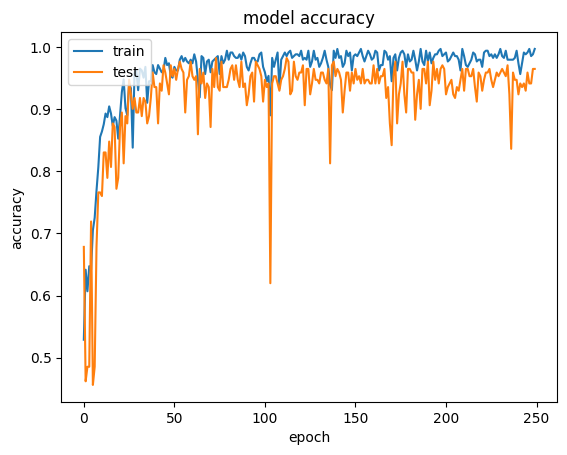

In [67]:
plt.plot(His.history['accuracy'])
plt.plot(His.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

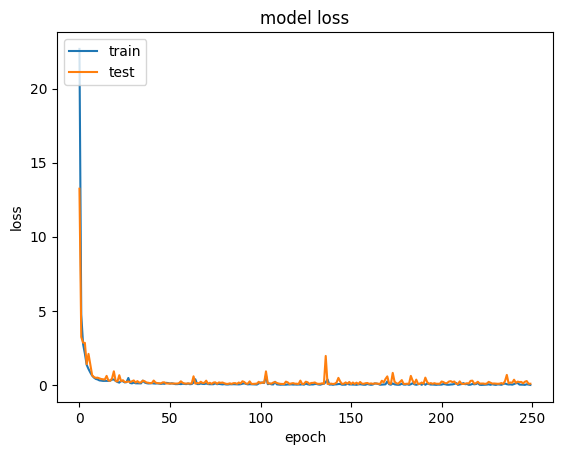

In [68]:
plt.plot(His.history['loss'])
plt.plot(His.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

Neural Network Parameter

In [69]:
# Standardization
from sklearn.preprocessing import StandardScaler
S = StandardScaler()
S.fit(X)
X_Standardized = S.transform(X)

In [70]:
pd.DataFrame(X_Standardized).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,517.000000,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,0.000000,5.153840e-17,-1.752306e-15,-2.748715e-17,6.871787e-17,1.030768e-17,2.542561e-16,2.198972e-16,-4.191790e-16,-6.871787e-18,4.123072e-17
std,1.000969,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.317959,-1.423121e+00,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,-2.020198e-01
25%,-1.089076,-9.031536e-01,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,-2.020198e-01
50%,0.055339,1.367805e-01,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,-1.938429e-01
75%,1.199754,6.567476e-01,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,-9.870852e-02
max,1.199754,1.696682e+00,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,1.695111e+01


In [71]:
def create_model():
  model.add(Dense(15, input_dim=11, init ='uniform', activation='relu',))
  model.add(Dense(11, init ='uniform', activation='relu',))
  model.add(Dense(1, init ='uniform', activation='sigmoid',))
  adam = Adam(lr=0.01)
  model.compile(loss='binary_crossentropy', optimizer = adam, metrics =['accuracy'])
  return model

In [72]:
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn = create_model, verbose = 0, batch_size = 40, epochs = 10)

<ipython-input-72-2d01f92a88eb>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model, verbose = 0, batch_size = 40, epochs = 10)


In [73]:
model